# Support Vector Machine (SVM)

# Q2-SalaryData
Classify the SizeCategorie using SVM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
salary_train = pd.read_csv("SalaryData_Train(1).csv")
salary_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
salary_test = pd.read_csv("SalaryData_Test(1).csv")
salary_test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
string_columns=["age","workclass","education","educationno","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","nati

# EDA

In [6]:
df=salary_train

In [7]:
df.shape

(30161, 14)

In [8]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
df.keys()

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
df.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [13]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
df['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

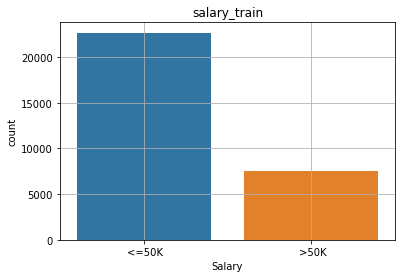

In [15]:
sns.countplot('Salary',data=df)
plt.title('salary_train')
plt.grid(True)
plt.show()

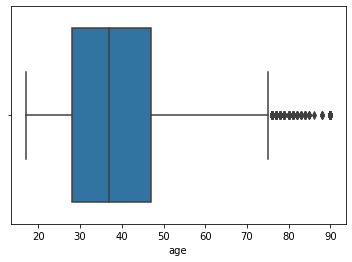

In [16]:
ax = sns.boxplot(df['age']) #shows outliers

<AxesSubplot:>

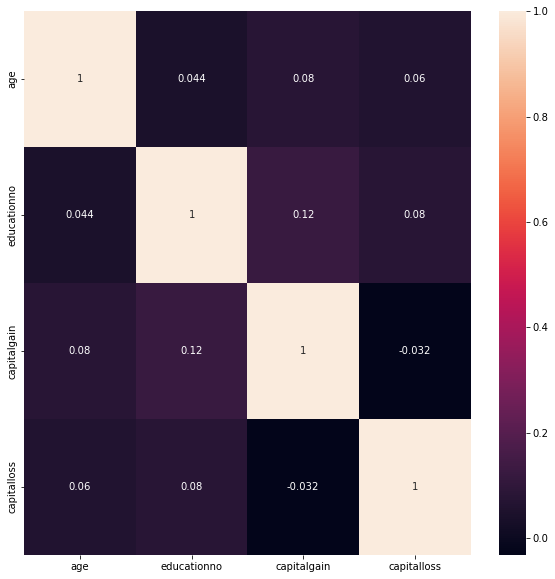

In [17]:
corr = df[df.columns[0:11]].corr()  #shows corelation
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Train & Test

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [27]:
salary_train= salary_train.apply(LabelEncoder().fit_transform)
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [28]:
salary_test= salary_test.apply(LabelEncoder().fit_transform)
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [31]:
col = df.columns
x_train = salary_train[col[0:13]]
y_train = salary_train[col[13]]
x_test = salary_test[col[0:13]]
y_test = salary_test[col[13]]

# Linear

In [32]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear==y_test)

0.8041832669322709

# Poly

In [33]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test)

0.8195219123505976

# RBF

In [34]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test)

0.8118193891102258

# Sigmoid

In [35]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
np.mean(pred_test_sigmoid==y_test)

0.5916998671978752

# Conclusion

Poly Model gives the best accuracy